**Import Libraries**

In [27]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from IPython.display import FileLink
from IPython.display import display
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Web Scraping**

In [28]:
# Build scraper

url = "https://en.wikipedia.org/wiki/List_of_ski_areas_and_resorts_in_the_United_States"

response = requests.get(url)

soup = BeautifulSoup(response.text, 'html.parser')

state_headings = soup.find_all("h3")

ski_resorts_data = []

for heading in state_headings:
  state = heading.text.strip().replace("[edit]", "")
  ul = heading.find_next_sibling("ul")
  if ul:
    ski_resorts = ul.find_all("li")
    for resort in ski_resorts:
      resort_info = resort.text.split("—")
      if len(resort_info) == 2:
        ski_resort = resort_info[0].strip()
        city = resort_info[1].strip()
        ski_resorts_data.append({"Ski Resort": ski_resort, "City": city, "State": state})

ski_resorts_df = pd.DataFrame(ski_resorts_data)

In [29]:
display(ski_resorts_df)

,Ski Resort,City,State
0,Mohawk Mountain Ski Area,Cornwall,Connecticut
1,Mount Southington,Plantsville,Connecticut
2,Powder Ridge Ski Area,Middlefield,Connecticut
3,Ski Sundown,New Hartford,Connecticut
4,Baker Mountain,Bingham,Maine
...,...,...,...
445,Sitzmark Ski Area,Tonasket,Washington
446,Ski Bluewood,near Dayton,Washington
447,Stevens Pass,Stevens Pass,Washington
448,The Summit at Snoqualmie,Snoqualmie Pass\nAlpental\nSummit Central\nSum...,Washington


In [30]:
# Data cleaning

# Removes "near " before city name
ski_resorts_df['City'] = ski_resorts_df['City'].str.replace(r'^near\s*', '', regex=True)

# Removes unnecessary text in parentheses and brackets
ski_resorts_df['City'] = ski_resorts_df['City'].str.replace(r'[\[\(].*[\]\)]', '', regex=True)

# Some resorts have multiple cities listed. Pulls first city only.
ski_resorts_df['City'] = ski_resorts_df['City'].str.split('\n').str[0]

In [31]:
display(ski_resorts_df)

,Ski Resort,City,State
0,Mohawk Mountain Ski Area,Cornwall,Connecticut
1,Mount Southington,Plantsville,Connecticut
2,Powder Ridge Ski Area,Middlefield,Connecticut
3,Ski Sundown,New Hartford,Connecticut
4,Baker Mountain,Bingham,Maine
...,...,...,...
445,Sitzmark Ski Area,Tonasket,Washington
446,Ski Bluewood,Dayton,Washington
447,Stevens Pass,Stevens Pass,Washington
448,The Summit at Snoqualmie,Snoqualmie Pass,Washington


In [32]:
ski_resorts_df.to_csv('ski_resorts.csv', index=False)

FileLink('ski_resorts.csv')

/content/ski_resorts.csv

**Exploratory Data Analysis**

In [33]:
ski_resorts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Ski Resort  450 non-null    object
 1   City        450 non-null    object
 2   State       450 non-null    object
dtypes: object(3)
memory usage: 10.7+ KB


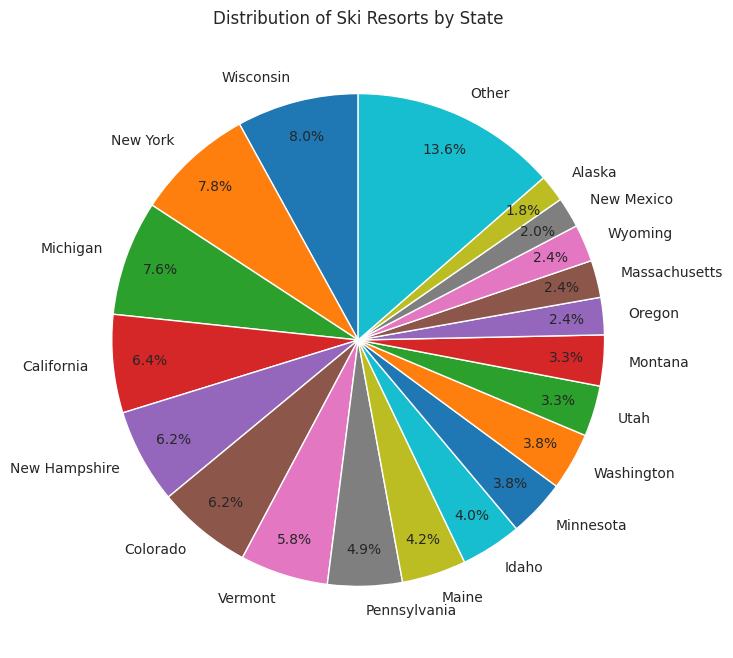

In [34]:
state_counts = ski_resorts_df['State'].value_counts()

threshold = 7

other_states = state_counts[state_counts < threshold]
other_count = other_states.sum()
state_counts = state_counts[state_counts >= threshold]
state_counts['Other'] = other_count

plt.figure(figsize=(8, 8))
sns.set_style("whitegrid")
plt.pie(state_counts, labels=state_counts.index, startangle=90, autopct='%1.1f%%', pctdistance=0.85)
plt.title('Distribution of Ski Resorts by State')
plt.show()

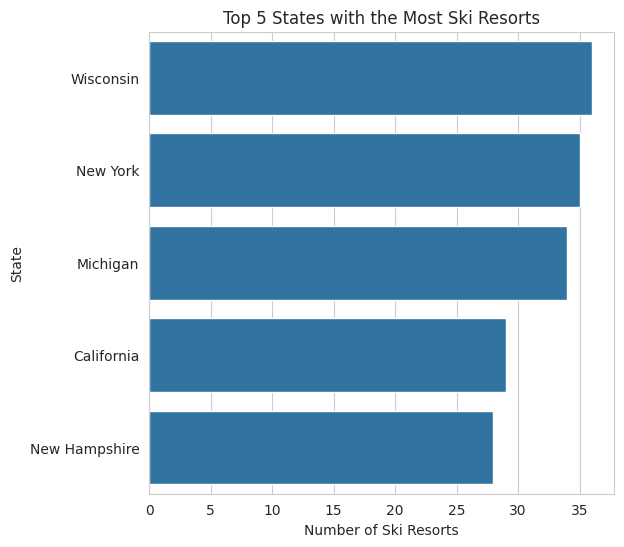

In [35]:
state_counts = ski_resorts_df['State'].value_counts()

top_5_states = state_counts.head(5)

plt.figure(figsize=(6,6))
sns.set_style("whitegrid")
sns.barplot(x=top_5_states.values, y=top_5_states.index)
plt.title('Top 5 States with the Most Ski Resorts')
plt.xlabel('Number of Ski Resorts')
plt.ylabel('State')
plt.show()